In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rawdata = pd.read_csv("data/stocks-us-adjClose.csv")

In [ ]:
# df1: rename date column appropriately, and convert datatype from string to Timestamp
dict1 = {rawdata.columns[0]: 'date'}

df1 = rawdata.rename(columns=dict1, inplace=False)
df1['date'] = pd.to_datetime(df1['date'])
df_revisions = {'df1': 'date column appropriately named and converted to Timestamp'}
type(df1['date'][0])

In [72]:
# df2: create new time columns: year, week, year-week
df2 = df1
df2['year'] = df2['date'].apply(lambda date: date.strftime('%Y'))
df2['week#'] = df2['date'].apply(lambda date: date.strftime('%W'))
df2['year_week#'] = df2['date'].apply(lambda date: date.strftime('%Y wk%W'))
# setting new date columns to appear first:
new_columns_list = ['year', 'year_week#', 'week#']
df2 = df2.set_index(new_columns_list).reset_index()

In [86]:
# groupby: weekly
df_weekly = df2.groupby('year_week#').mean()

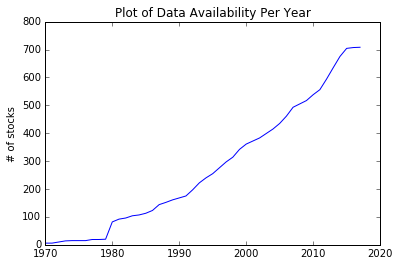

In [95]:
plottitle = 'Plot of Data Availability Per Year'
showplot=True

df_annual = df2.groupby('year').mean()
df_years_avail = df_annual.transpose().count()

if showplot:
    fig = plt.figure()
    axes = fig.add_axes()
    plt.plot(df_years_avail)
    plt.title(plottitle)
    plt.ylabel('# of stocks')
    plt.show()

    # same plot, except x-label is simply 'year'
    #df_years_avail.sort_index().plot()
    #plt.show()

# data prep for a neural network 

## supervised learning: binary outcome 

In [96]:
df_weekly.head(2)

,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,AVP,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
year_week#,,,,,,,,,,,,,,,,,,,,,
1970 wk00,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970 wk01,0.315412,0.000473,0.582503,1.822623,1.412129,1.837964,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### calc ups and downs
1. 1-yr delta $$(t_1-t_0)$$
2. all yrs, 1 stock
3. all stocks

In [13]:
delta_threshold = 0.1

#1.
    # a. current, transposed form
    #df_weekly_t.loc['ED', ['1970', '1971']]

    # b. original, un-transposed form
z = df_weekly.loc[['1970','1971'],'ED']
zz = z
zz[0] = 0
zz[1] = z[1] - z[0] > delta_threshold

#2.
ED = df_weekly_t.loc['ED']
#2.a: subset
#EDh = ED.head()
#EDh[1] - EDh[0] > delta_threshold

#2.b. loop-approach
#ED[1] - ED[0] > delta_threshold
df_weekly.head(2)

## WARNING: 
The following block modifies the original price data in df_weekly.
This is because ED and ED_delta are POINTERS, not separate, indep datatypes.
Ok for now.

ED_delta = ED
ED_delta[0] = 0
for i in range(len(ED)-1):
    #print("ED[{}] minus ED[{}]".format(i+1, i))
    ED_delta[i] = ED[i+1] - ED[i] > delta_threshold

#### 2.c.? vectorized approach

In [14]:
# rawdata is maintained
rawdata.iloc[1,1]

0.320831

## TASK:
The last row should be calculated, and is not currently done.

In [15]:
df_weekly.tail(2)

,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,AVP,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
year,,,,,,,,,,,,,,,,,,,,,
2016,70.875459,64.573471,95.081116,62.699782,75.764173,41.664344,39.575695,11.848510,73.970544,4.677976,...,15.421825,12.501508,NaN,13.009980,23.298239,23.077322,23.712598,25.640315,33.981705,NaN
2017,78.300586,78.451687,106.738288,61.272114,101.251551,52.953227,50.047040,11.410892,80.252411,4.078035,...,28.498844,10.633931,NaN,24.085433,25.101622,25.406869,19.051445,26.075409,19.098150,26.099459


#3.
tickers = df_weekly.columns
i = 1
this_stock = df_weekly_t.loc[tickers[i]]
this_stock = this_stock.head()

this_delta = this_stock
this_delta[0] = 0
for i in range(len(this_stock)-1):
    this_delta[i] = this_stock[i+1] - this_stock[i] > delta_threshold

#3.c.? vectorized approach

In [16]:
# double-loop
tickers = df_weekly.columns
for stock in tickers:
    this_stock = df_weekly_t.loc[stock]
    #this_h = this_stock.head()

    this_delta = this_stock
    this_delta[0] = 0
    for i in range(len(this_stock)-1):
        this_delta[i] = this_stock[i+1] - this_stock[i] > delta_threshold

#3.c.? vectorized approach

In [17]:
df_weekly.tail(11)

,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,AVP,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
year,,,,,,,,,,,,,,,,,,,,,
2007,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2008,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2009,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2010,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2011,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2012,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2014,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2015,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [18]:
# Temporary workaround, this is NOT a fix but a warp of the data.
df_weekly.loc['2017'] = 0

# Outcome:
it's a success; i can convert the enter df_weekly into binary.

#### Accidental conversion from NaN into 0:

0 indicates "do not select this stock: it doesn't return above a threshold."

NaN indicates "you cannot select this stock".  Fair enough

#### Weekly averages


# Keras

In [19]:
import keras   # doesn't consume too much memory
keras.__version__

'2.1.3'

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, you should use the _Keras functional API_
https://keras.io/

For **Dense** layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.  (Note that the final layer for MNIST has an output size of 10, corresponding to the 10 classes of digits.)
https://elitedatascience.com/keras-tutorial-deep-learning-in-python

#### funny enough, this dummy data below is too insufficiently basic for the keras model to train. Can't set weights manually in keras.
dmodel_01 = df1[['ED', 'DD']].head(2)
dmodel_01
nodes_per_layer = dmodel_01.shape

#### This obviates my original plan:
    ''' the worst neural network possible!
    What makes this awful?
    - a perceptron model (i.e., zero hidden layers; computational power can easily be done in Excel [productsum() function])
    - feed-forward NN, thus it's not taking advantage of the time-series nature of its data.
    - input: only 2 stocks.
    - data size: only two business days -- the first two
    '''

In [ ]:
num_stocks = df_weekly.shape[1]  # 710

def build_model_01(nodes_per_layer=num_stocks):

    model = Sequential()

    # First layer:
    model.add(Dense(units=nodes_per_layer, input_dim=nodes_per_layer, activation='sigmoid'))

    # Output layer:
    model.add(Dense(1))

    model.compile(optimizer='sgd', loss='rmse', metrics=['accuracy'])
    
    return model

In [ ]:
# Show a model summary

model_01 = build_model()
model_01.summary()

In [ ]:
# Train on data

model_01.fit(epochs=10)

'''model_01.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
'''

In [ ]:
num_stocks = df_weekly.shape[1]  # 710


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
